<a href="https://colab.research.google.com/github/tahani319/DS_Capstone_RFM_Analysis/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Information:**

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01.12.2010 and 09.12.2011.

The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. 
[https://archive.ics.uci.edu/ml/datasets/online+retail]


**Attribute Information:**

* InvoiceNo: Invoice number. Nominal. A 6-digit integral
* number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.








**import libraries:**

In [512]:
#import libraries

import pandas as pd # for dataframes
import numpy as np
import seaborn as sns #for gaphs 
import matplotlib.pyplot as plt # for plotting graphs

import datetime as dt 
import missingno as msno



**Dataset:**

In [465]:
transactions = pd.read_excel('onlineretail.xlsx')

**Explore Data:**

Data head:

In [466]:
transactions.head() #the first row of data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data tail:

In [467]:
transactions.tail()  #the last row of data 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**checke the data-types of the data:**

In [468]:
transactions.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

**data information:** 

In [469]:
transactions.info()  #data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [470]:
transactions.Quantity. describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [471]:
transactions.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

**Missing Values:**

In [472]:
print('Number of Missing Values:' ,  transactions.isnull().sum()) ##check null values 

Number of Missing Values: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


visualize missing values:

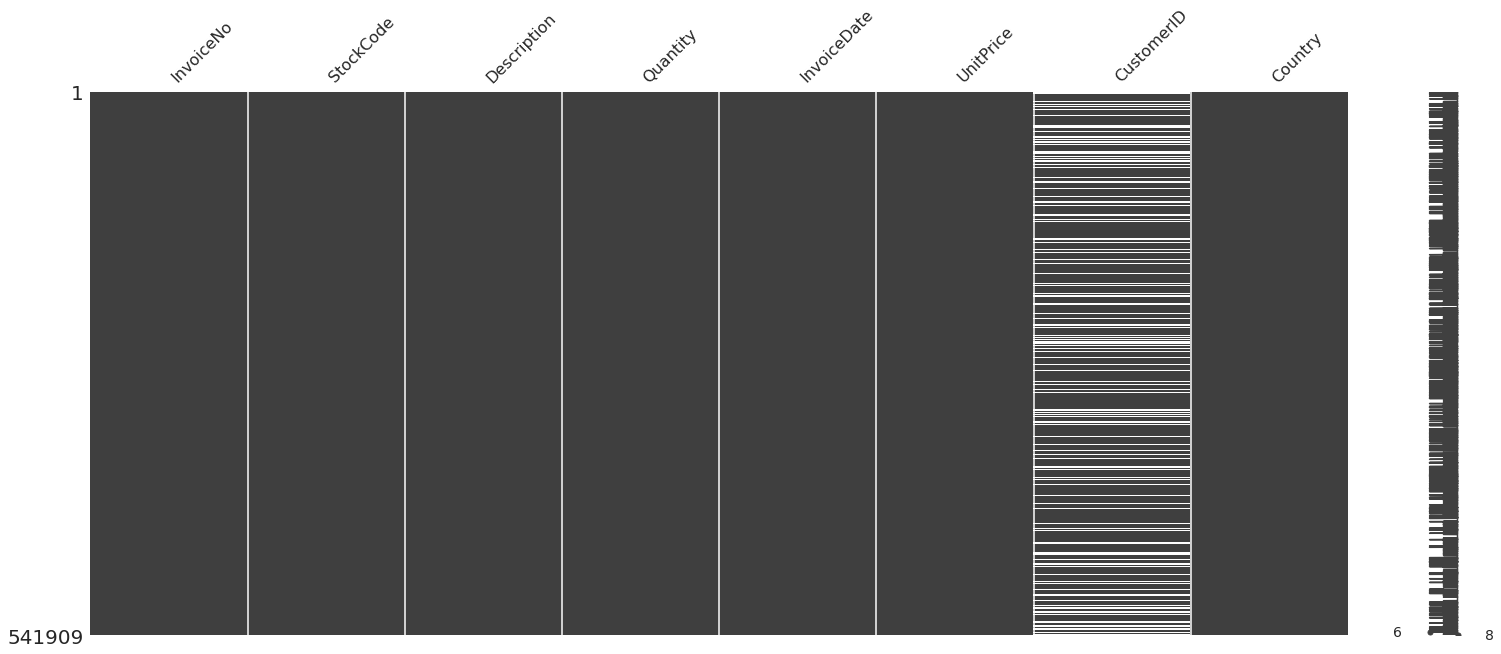

In [473]:
msno.matrix(transactions)
plt.show()

**Duplicated values:**

In [474]:
print('Number of duplicated records: ', transactions.duplicated(keep='first').sum()) #check duplicated values

Number of duplicated records:  5268


**check canceled transactions:**

In [475]:
canceled = transactions[transactions["InvoiceNo"].str.contains("C",na=False)]
canceled.sort_values("Quantity", ascending = True).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom


In [476]:
canceled.info() #to see how canceled transactions do we have 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9288 non-null   object        
 1   StockCode    9288 non-null   object        
 2   Description  9288 non-null   object        
 3   Quantity     9288 non-null   int64         
 4   InvoiceDate  9288 non-null   datetime64[ns]
 5   UnitPrice    9288 non-null   float64       
 6   CustomerID   8905 non-null   float64       
 7   Country      9288 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 653.1+ KB


**see the customer with most returns:**

In [477]:
ReturnCust = transactions[transactions.Quantity<0].groupby(['CustomerID','Country'])['Quantity'].sum()
ReturnCust = ReturnCust.abs().sort_values(ascending=False)[0:10]

Text(0.5, 1.0, 'Customers with most Returns')

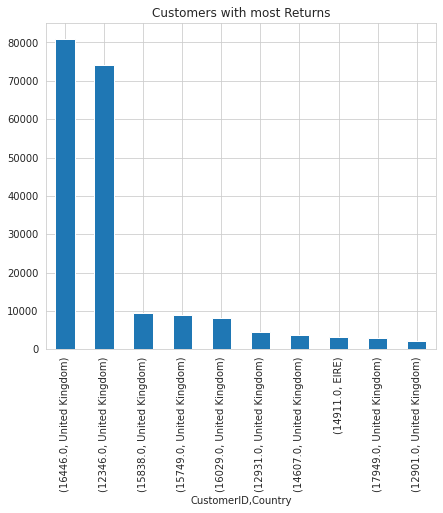

In [478]:
plt.figure(figsize=(7,6))
ReturnCust.plot(kind='bar')
plt.title('Customers with most Returns')

### **Data preparation:**

Here we do: 

* drop missing values 
*  drop duplicated values 
* remove negative and 0 quantites and price 

**Drop missing values:**

In [479]:
#drop missing values
transactions.dropna (axis=0, inplace= True) 


**Drop duplicated values:**

In [480]:
transactions.drop_duplicates(keep=False,inplace=True)  #drop duplicated values 


 **Remove negative and zero quantities and prices:**

In [482]:
# Remove negative and 0 quantities and prices
transactions= transactions[transactions['Quantity']>0]
transactions= transactions[transactions['UnitPrice']>0]

**we show here the top 20 countries of most records in data:**

In [483]:
#show the top 20 countires of the most records 
# UK has maximum records of transactions

countries= transactions.Country.value_counts()
countries.head(20)


United Kingdom     344466
Germany              9010
France               8311
EIRE                 7216
Spain                2474
Netherlands          2359
Belgium              2031
Switzerland          1841
Portugal             1445
Australia            1180
Norway               1071
Italy                 758
Channel Islands       746
Finland               685
Cyprus                593
Sweden                449
Austria               398
Denmark               380
Poland                330
Japan                 321
Name: Country, dtype: int64

**visualization of the top 20 of most countries of records:** 

Text(0.5, 1.0, 'Top Countries')

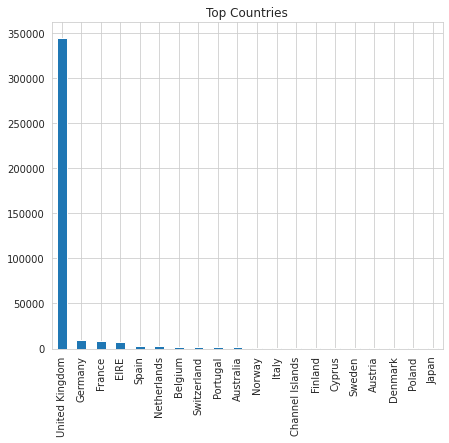

In [484]:
plt.figure(figsize=(7,6)) #plot the top countries of the most records 
countries.head(20).plot(kind='bar')
plt.title('Top Countries')

as we see that United Kindom has the most records among countries so we choose uk to do RFM analysis 

In [485]:
uk_transactions = transactions[transactions['Country']=='United Kingdom'] #choose united kingdom 

**Explore and visualize the most sold products in United Kingdom:**

In [486]:
#explore and visualize the most sold products in United Kingdom
most_sold = uk_transactions['Description'].value_counts().head(15)

print('Most Sold Products: \n')
print(most_sold)

Most Sold Products: 

WHITE HANGING HEART T-LIGHT HOLDER    1919
JUMBO BAG RED RETROSPOT               1458
REGENCY CAKESTAND 3 TIER              1408
ASSORTED COLOUR BIRD ORNAMENT         1307
PARTY BUNTING                         1293
LUNCH BAG RED RETROSPOT               1123
SET OF 3 CAKE TINS PANTRY DESIGN      1007
LUNCH BAG  BLACK SKULL.                999
PAPER CHAIN KIT 50'S CHRISTMAS         954
HEART OF WICKER SMALL                  940
NATURAL SLATE HEART CHALKBOARD         935
SPOTTY BUNTING                         916
LUNCH BAG CARS BLUE                    881
LUNCH BAG SPACEBOY DESIGN              863
WOODEN PICTURE FRAME WHITE FINISH      855
Name: Description, dtype: int64


Text(0.5, 1.0, 'Most Sold Products from United Kingdom Customers')

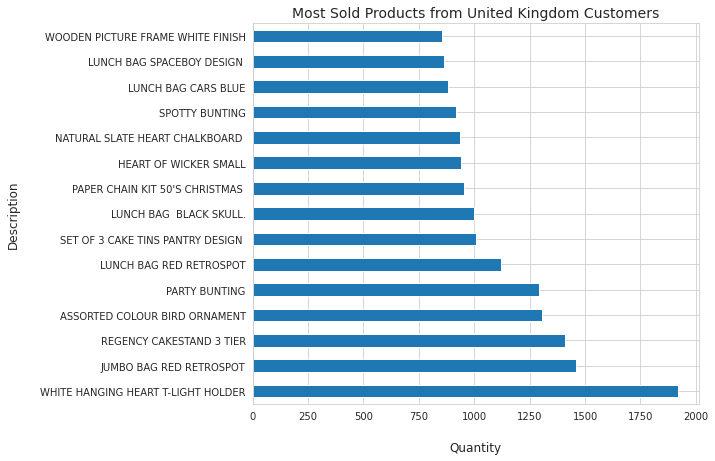

In [487]:
plt = most_sold.plot(kind='barh', figsize=(8, 7))
 # Set x-axis label
plt.set_xlabel("Quantity", labelpad=20, size=12)

  # Set y-axis label
plt.set_ylabel("Description", labelpad=20, size=12)


plt.set_title('Most Sold Products from United Kingdom Customers', fontsize= 14)

**RFM analysis:**

Steps of RFM(Recency, Frequency, Monetary):

* Calculate the Recency, Frequency, Monetary values for each customer.
* Add segment bin values to RFM table using quartile.
* Sort the customer RFM score in ascending order.



select the columns we need for RFM analysis 
which are CustomerID , Invoice No, Inovice Date, Quantity  Unit price : 

In [488]:
uk_transactions= uk_transactions[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]


add new column "Amount" to calculate the total purchased amount by multiplying Unitprice by Quantity: 

In [489]:
uk_transactions['Amount'] = uk_transactions['Quantity'] * uk_transactions['UnitPrice']


check the first day purchase and last day purchase: 

In [490]:
#check the first day purchase and last day purchase
uk_transactions['InvoiceDate'].min(),uk_transactions['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [491]:
PRESENT = dt.datetime(2011,12,10)
uk_transactions['InvoiceDate'] = pd.to_datetime(uk_transactions['InvoiceDate'])

In [492]:
uk_transactions.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Amount
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [493]:
rfm= uk_transactions.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Amount': lambda price: price.sum()})

In [494]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'Amount'], dtype='object')

Calculate the Recency, Frequency, Monetary values for each customer:

In [495]:
# Change the name of columns
rfm.columns=['monetary','frequency','recency']

In [496]:
rfm['recency'] = rfm['recency'].astype(int)

In [497]:
# Filter out non repeat customers
rfm = rfm[rfm['frequency']>0]

In [498]:
# Filter out monetary outliers
rfm = rfm[rfm['monetary']<2000]

In [499]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4242,32449
12749.0,3,199,4090
12820.0,3,59,942


 Add segment bin values to RFM table using quartile:

In [500]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4242,32449
12749.0,3,199,4090
12820.0,3,59,942


In [501]:
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm['R'] = rfm['recency'].apply(RFMScore, args=('recency',quantiles,))
rfm['F'] = rfm['frequency'].apply(RFMScore, args=('frequency',quantiles,))
rfm['M'] = rfm['monetary'].apply(RFMScore, args=('monetary',quantiles,))

In [502]:
rfm.head()

,monetary,frequency,recency,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183,4,1,4
12747.0,2,103,4196,4,4,1
12748.0,0,4242,32449,4,4,1
12749.0,3,199,4090,4,4,1
12820.0,3,59,942,3,3,1


In [503]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

In [504]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [505]:
rfm.head()

,monetary,frequency,recency,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183,4,1,4,414,9
12747.0,2,103,4196,4,4,1,441,9
12748.0,0,4242,32449,4,4,1,441,9
12749.0,3,199,4090,4,4,1,441,9
12820.0,3,59,942,3,3,1,331,7


In [506]:
# Create human friendly RFM labels
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][2-3]': 'At risk',
    r'[1-2]4': 'Can\'t loose them',
    r'2[1-2]': 'About to sleep',
    r'22': 'Need attention',
    r'[2-3][3-4]': 'Loyal customers',
    r'31': 'Promising',
    r'41': 'New customers',
    r'[3-4][1-2]': 'Potential loyalists',
    r'4[3-4]': 'Champions'
}
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [507]:
rfm.head()

,monetary,frequency,recency,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346.0,325,1,77183,4,1,4,414,9,New customers
12747.0,2,103,4196,4,4,1,441,9,Champions
12748.0,0,4242,32449,4,4,1,441,9,Champions
12749.0,3,199,4090,4,4,1,441,9,Champions
12820.0,3,59,942,3,3,1,331,7,Loyal customers


In [508]:
# List the head of the table to view the 
rfm.head(5)

,monetary,frequency,recency,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346.0,325,1,77183,4,1,4,414,9,New customers
12747.0,2,103,4196,4,4,1,441,9,Champions
12748.0,0,4242,32449,4,4,1,441,9,Champions
12749.0,3,199,4090,4,4,1,441,9,Champions
12820.0,3,59,942,3,3,1,331,7,Loyal customers


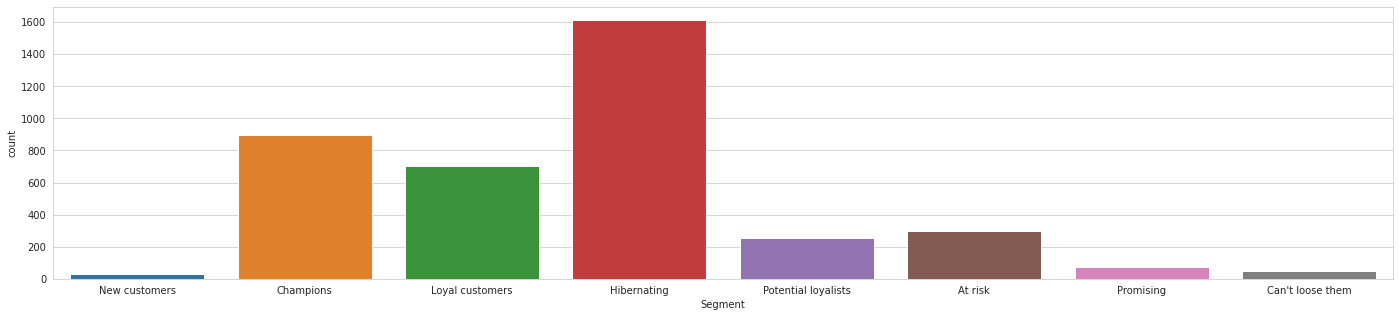

In [513]:
#plot 
plt.figure(figsize=(24,5))
ax = sns.countplot(x="Segment", data=rfm)